In [8]:
import pandas as pd
import numpy as np

data = pd.read_csv('adult-data.csv')
data.describe()

data = data.ffill()


data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income\t
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


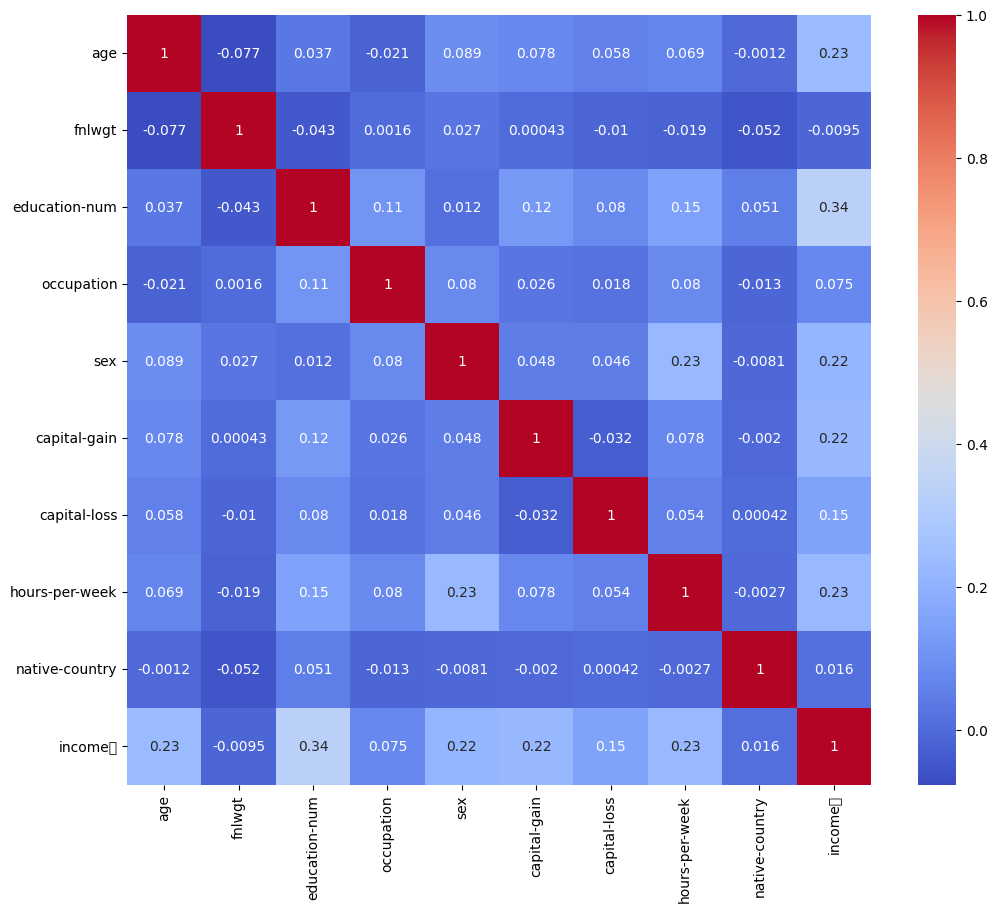

In [9]:
#Statistical Analysis and cleanup
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
data = data.drop('education', axis=1)


encoder = OrdinalEncoder()
data['native-country'] =  encoder.fit_transform(data['native-country'].astype('str').values.reshape(-1, 1))
data['occupation'] = encoder.fit_transform(data['occupation'].astype('str').values.reshape(-1, 1))

Y = data['income\t']
data1 = data.drop('income\t',axis=1)
data1 = pd.get_dummies(data1)

Graphdata = data.drop(['workclass','marital-status','relationship','race'],axis = 1)
Graphdata['sex'] = encoder.fit_transform(data['sex'].astype('str').values.reshape(-1, 1))
Graphdata['income\t'] = encoder.fit_transform(data['income\t'].astype('str').values.reshape(-1, 1))

corrmat = Graphdata.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [10]:

X = data1
X


,age,fnlwgt,education-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,workclass_ ?,workclass_ Federal-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,1.0,2174,0,40,39.0,False,False,...,False,False,False,False,False,False,False,True,False,True
1,50,83311,13,4.0,0,0,13,39.0,False,False,...,False,False,False,False,False,False,False,True,False,True
2,38,215646,9,6.0,0,0,40,39.0,False,False,...,False,False,False,False,False,False,False,True,False,True
3,53,234721,7,6.0,0,0,40,39.0,False,False,...,False,False,False,False,False,True,False,False,False,True
4,28,338409,13,10.0,0,0,40,5.0,False,False,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,13.0,0,0,38,39.0,False,False,...,False,False,True,False,False,False,False,True,True,False
32557,40,154374,9,7.0,0,0,40,39.0,False,False,...,False,False,False,False,False,False,False,True,False,True
32558,58,151910,9,1.0,0,0,40,39.0,False,False,...,False,True,False,False,False,False,False,True,True,False
32559,22,201490,9,1.0,0,0,20,39.0,False,False,...,True,False,False,False,False,False,False,True,False,True


In [11]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(max_depth=3, random_state=42)


# Perform 10-fold cross-validation
cv_scores = cross_val_score(DT, X, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max Decision Tree score: {cv_scores.max()}")


Max Decision Tree score: 0.8528869778869779


In [12]:
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
# 
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max KNN score: {cv_scores.max()}")


Max KNN score: 0.8258599508599509


Cross validation on SVC takes too much time


In [16]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Find best parameters using Hyperparameter Tuning

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly']
# }
# svc = SVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
#                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_scaled, Y)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(best_params,best_score)
# implement best_params

svc = SVC(C=10, gamma='scale', kernel= 'rbf')

cv_scores = cross_val_score(svc, X_scaled, Y,cv=2)

# Output the cross-validation scores for each fold
print(f"Max SVC score: {cv_scores.max()}")


Max SVC score: 0.8450859950859951
